In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [147]:
df=pd.read_csv("Mobile_data.csv")
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [149]:
df.isna().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

<AxesSubplot:xlabel='price_range', ylabel='Density'>

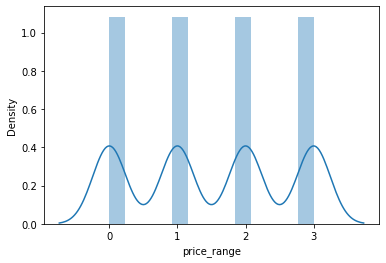

In [150]:
sns.distplot(df['price_range'])

<AxesSubplot:xlabel='price_range', ylabel='count'>

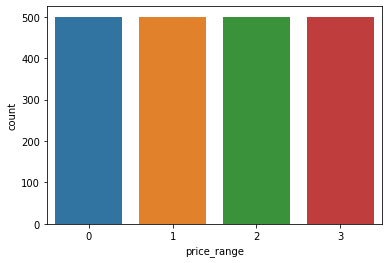

In [151]:
sns.countplot(df['price_range'])

<AxesSubplot:>

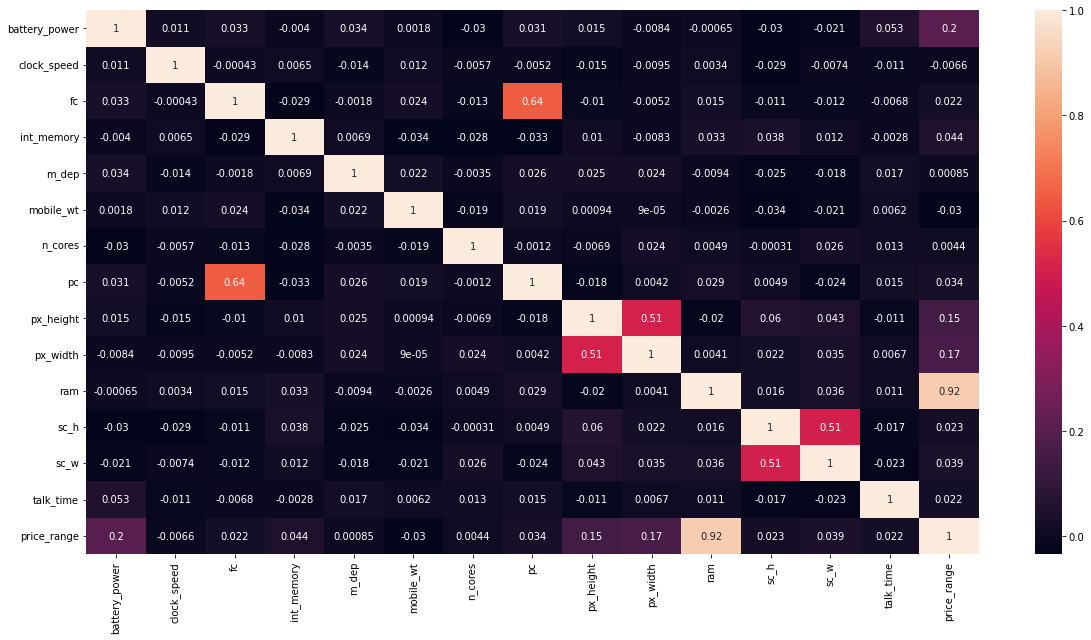

In [152]:
plt.figure(figsize=(20.,10))
sns.heatmap(df.corr(),annot=True)

In [153]:
corr=df.corr()['price_range']
corr

battery_power    0.200723
clock_speed     -0.006606
fc               0.021998
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
price_range      1.000000
Name: price_range, dtype: float64

In [154]:
hr=corr[(corr>0.5)&(corr<1)].index
hr

Index(['ram'], dtype='object')

In [155]:
X=df[hr]
y=df.iloc[:,-1]

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [158]:
X_train.shape

(1600, 1)

In [159]:
X_test.shape

(400, 1)

In [160]:
y_train.shape

(1600,)

In [161]:
y_test.shape

(400,)

In [162]:
# scaling
from sklearn.preprocessing import StandardScaler

In [163]:
sc=StandardScaler()

In [164]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [165]:
# predicting

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
knn=KNeighborsClassifier(n_neighbors=5)

In [168]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [169]:
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
print("Train Accuracy")
print(accuracy_score(y_train,y_pred_train))

Train Accuracy
0.790625


In [172]:
print("test Accuracy")
print(accuracy_score(y_test,y_pred_test))

test Accuracy
0.695


In [181]:
param_grid={"n_neighbors":[2,4,5,7,9],"metric":['euclidean','minkowski','manhatten'],"weights":['uniform','distance']}

In [182]:
from sklearn.model_selection import GridSearchCV

In [193]:
model=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1,scoring="accuracy")

In [194]:
model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'minkowski', 'manhatten'],
                         'n_neighbors': [2, 4, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [195]:
model.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

In [196]:
model.best_score_

0.7449951163297285

In [197]:
knn1=KNeighborsClassifier(metric= 'euclidean', n_neighbors= 9, weights= 'uniform')

In [198]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [199]:
y_train_pred=knn1.predict(X_train)
y_test_pred=knn1.predict(X_test)

In [200]:
print("Train Accuracy")
print(accuracy_score(y_train,y_pred_train))

Train Accuracy
0.790625


In [201]:
print("test Accuracy")
print(accuracy_score(y_test,y_pred_test))

test Accuracy
0.695
